# Proyek Analisis Data: bike_sharing_dataset
- **Nama:** Muhammad Hanif Al Azis
- **Email:** hanifalaziz51@gmail.com
- **ID Dicoding:** hifaliz

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah pengguna sepeda?
- Bagaimana tren penyewaan sepeda berdasarkan bulan-tahun?

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [7]:
data=pd.read_csv('data/bike_sharing_dataset_day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

Ini adalah dataset tentang *bike sharing system*, berikut penjelasan kolom-kolom penting:

- dteday: Tanggal.
- season: Musim (1: Winter, 2: Spring, 3: Summer, 4: Fall).
- yr: Tahun (0: 2011, 1: 2012).
- temp dan atemp: Suhu aktual dan suhu yang dirasakan.
- hum: Kelembaban.
- windspeed: Kecepatan angin.
- casual dan registered: Jumlah pengguna kasual dan terdaftar.
- cnt: Total jumlah pengguna.

### Assessing Data

In [150]:
# Check the structure and summary of the dataset
print(data.info())
data.isnull().sum()
print("Jumlah duplikasi: ", data.duplicated().sum())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
Jumlah duplikasi:  0
          instant      season          yr        mnth     holiday  

**Insight:**
- Dataset tersebut memiliki 16 kolom dan 731 baris.
- Tidak memiliki data yang kosong.
- Tidak ada data yang duplikat.
- Data type pada kolom dteday masih berbentuk objek yang seharusnya adalah datetime. Ini akan diubah pada tahap cleaning.

### Cleaning Data

In [151]:
# Mengubah data type
datetime_columns = ["dteday"]

for column in datetime_columns:
  data[column] = pd.to_datetime(data[column])

# Me-replace value pada kolom season menjadi nama musim
data['season'] = data['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

**Insight:**
- Mengubah tipe data pada kolom dteday dari object menjadi datetime
- Mengubah atau me-replace value pada kolom season menjadi nama musim

In [152]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [153]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


tipe data pada kolom dteday dan value pada kolom season telah berhasil diubah

## Exploratory Data Analysis (EDA)

### Explore ...

In [154]:
# Menghitung jumlah penyewaan sepeda berdasarkan musim
season_counts = data.groupby('season')['cnt'].sum().reset_index()

# Menampilkan hasil
print(season_counts)

   season      cnt
0    Fall  1061129
1  Spring   471348
2  Summer   918589
3  Winter   841613


**Insight:**
- Jumlah ini akan kita lakukan Visualisasi untuk menjawab pertanyaan pertama

In [155]:
# 1. Ekstrak Bulan dan Tahun
data['month'] = data['dteday'].dt.month
data['year'] = data['dteday'].dt.year

# 2. Gabungkan Bulan dan Tahun
data['month_year'] = data['year'].astype(str) + '-' + data['month'].astype(str).str.zfill(2)

# 3. Grouping dan Penjumlahan
monthly_yearly_counts = data.groupby('month_year')['cnt'].sum().reset_index()

# Menampilkan hasil
print(monthly_yearly_counts)

   month_year     cnt
0     2011-01   38189
1     2011-02   48215
2     2011-03   64045
3     2011-04   94870
4     2011-05  135821
5     2011-06  143512
6     2011-07  141341
7     2011-08  136691
8     2011-09  127418
9     2011-10  123511
10    2011-11  102167
11    2011-12   87323
12    2012-01   96744
13    2012-02  103137
14    2012-03  164875
15    2012-04  174224
16    2012-05  195865
17    2012-06  202830
18    2012-07  203607
19    2012-08  214503
20    2012-09  218573
21    2012-10  198841
22    2012-11  152664
23    2012-12  123713


**Insight:**
- Kita telah mengubah data tanggal menjadi bulan tahun
- Data ini akan kita gunakan untuk pertanyaan kedua

## Visualization & Explanatory Analysis

### Pertanyaan 1:

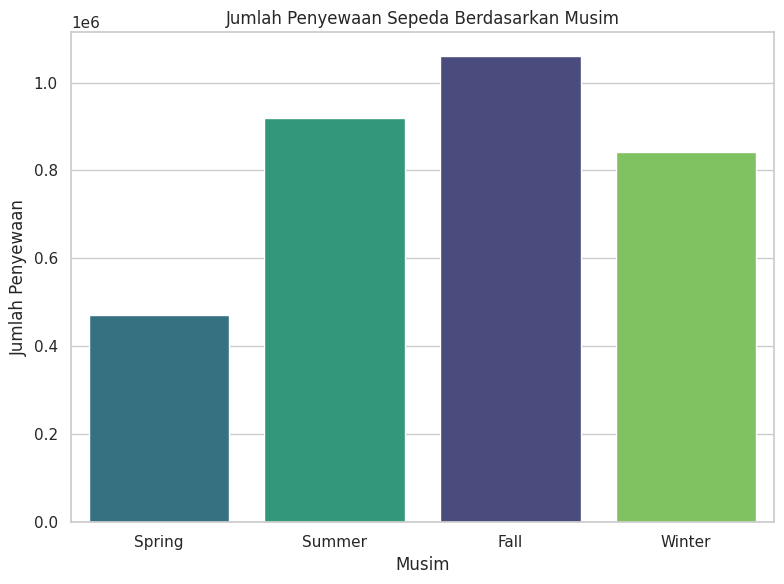

In [156]:
# Urutkan season_counts berdasarkan 'cnt' secara menurun (opsional, jika ingin tetap urut berdasarkan jumlah penyewaan)
# season_counts = season_counts.sort_values(by=['cnt'], ascending=False)

# Membuat bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', data=season_counts, hue='season', palette='viridis', legend=False, order=['Spring', 'Summer', 'Fall', 'Winter'])  # Ubah urutan di sini
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.tight_layout()
plt.show()

**Insight:**
- Jumlah penyewa sepeda berdasarkan musim mengalami peningkatan dari musim ke musim yang puncaknya di musim gugur dan mulai turun ketika memasuki musim dingin.

### Pertanyaan 2:

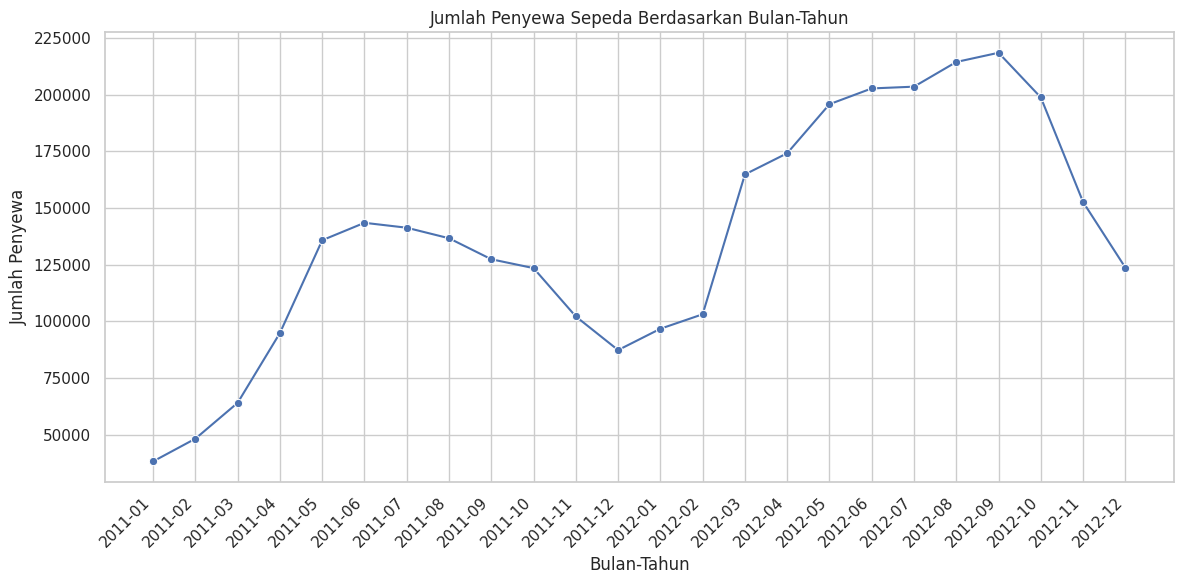

In [157]:
# Membuat line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_year', y='cnt', data=monthly_yearly_counts, marker='o')
plt.title('Jumlah Penyewa Sepeda Berdasarkan Bulan-Tahun')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Jumlah Penyewa')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**

- Terdapat peningkatan tren penyewaan sepeda dari tahun 2011 ke 2012
- Jumlah penyewa cenderung meningkat pada bulan-bulan musim panas (Juni-Agustus) dan menurun pada bulan-bulan musim dingin (Desember-Februari).
- Jumlah penyewa sepeda mencapai puncaknya pada pertengahan tahun 2012, khususnya di bulan Juli dan Agustus.
- Jumlah penyewa cenderung menurun pada akhir tahun, terutama di bulan Desember.

## Analisis Lanjutan (Opsional)

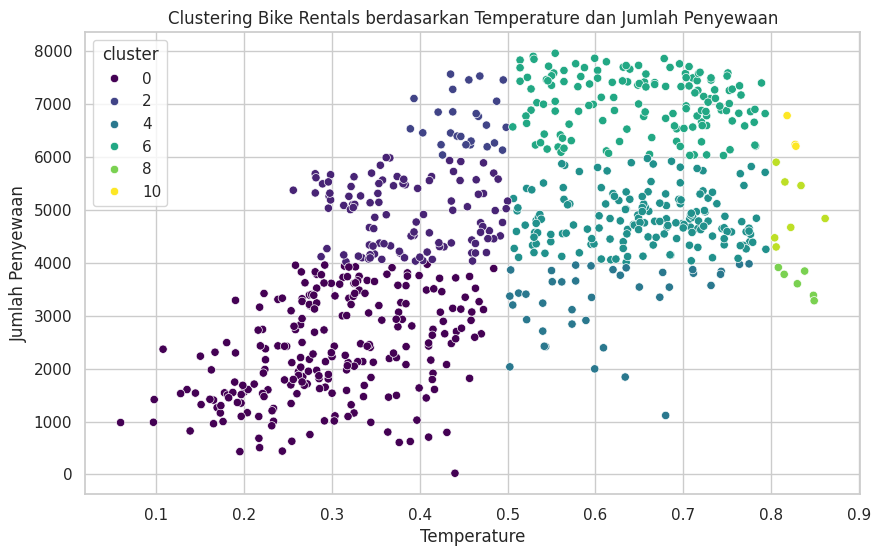

In [158]:
# 1. Menentukan batas-batas cluster
temp_bins = [0, 0.5, 0.8, 1.0]  # Batas-batas suhu untuk setiap cluster
cnt_bins = [0, 4000, 6000, 8000]  # Batas-batas jumlah penyewaan untuk setiap cluster

# 2. Membuat label cluster berdasarkan batas-batas yang telah ditentukan
data['cluster'] = pd.cut(data['temp'], bins=temp_bins, labels=False, include_lowest=True) * len(cnt_bins) + \
                   pd.cut(data['cnt'], bins=cnt_bins, labels=False, include_lowest=True)

# 3. Visualisasi hasil grouping
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', hue='cluster', data=data, palette='viridis')
plt.title('Clustering Bike Rentals berdasarkan Temperature dan Jumlah Penyewaan')
plt.xlabel('Temperature')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Penjelasan Analisis Lanjutan (Opsional)**

Pada analisis lanjutan, kita akan melakukan clustering (pengelompokan) data berdasarkan dua variabel, yaitu temperatur (temp) dan jumlah penyewaan (cnt). Tujuannya adalah untuk melihat apakah ada pola atau hubungan yang menarik antara kedua variabel tersebut.

**Langkah-langkah yang dilakukan:**

- Menentukan batas-batas cluster: Kita menetapkan rentang nilai untuk temperatur dan jumlah penyewaan untuk membagi data ke dalam beberapa cluster.
- Membuat label cluster: Data dikelompokkan ke dalam cluster berdasarkan rentang nilai yang telah ditentukan. Setiap cluster diberi label numerik.
- Visualisasi hasil grouping: Hasil clustering divisualisasikan menggunakan scatter plot, dengan temperatur pada sumbu x dan jumlah penyewaan pada sumbu y. Titik-titik data diberi warna berbeda berdasarkan clusternya.
Tujuan Analisis Lanjutan

**Tujuan utama dari analisis lanjutan ini adalah:**

- Mengidentifikasi pola hubungan antara temperatur dan jumlah penyewaan sepeda. Dengan mengelompokkan data, kita dapat melihat apakah ada korelasi atau pola tertentu antara kedua variabel tersebut.
- Mendapatkan wawasan lebih dalam tentang perilaku penyewaan sepeda. Analisis ini dapat membantu kita memahami bagaimana temperatur memengaruhi jumlah penyewaan sepeda, dan apakah ada kelompok pengguna yang berbeda berdasarkan preferensi temperatur.
- Memberikan informasi tambahan untuk pengambilan keputusan. Hasil analisis ini dapat digunakan untuk mengoptimalkan strategi operasional dan pemasaran, seperti menentukan jumlah sepeda yang tersedia, lokasi penempatan sepeda, atau target promosi berdasarkan preferensi pengguna.
Kesimpulan dari Analisis Lanjutan

**Dari visualisasi scatter plot, terlihat bahwa ada pola hubungan antara temperatur dan jumlah penyewaan sepeda:**

- Pada suhu rendah, jumlah penyewaan sepeda cenderung rendah.
- Pada suhu sedang, jumlah penyewaan sepeda bervariasi.
- Pada suhu tinggi, jumlah penyewaan sepeda cenderung tinggi.

Ini menunjukkan bahwa kondisi cuaca, khususnya temperatur, memiliki korelasi dengan jumlah penyewa sepeda. Informasi ini dapat digunakan oleh penyedia layanan bike sharing untuk mengantisipasi permintaan dan mengoptimalkan layanan mereka.

## Conclusion

**Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah pengguna sepeda?**

Conclution: Musim berpengaruh signifikan terhadap jumlah pengguna sepeda. Jumlah penyewaan sepeda tertinggi terjadi pada musim gugur, diikuti oleh musim panas dan semi. Musim dingin menunjukkan jumlah penyewaan terendah. Hal ini menunjukkan bahwa orang-orang cenderung lebih suka bersepeda saat cuaca hangat dan cerah.

**Pertanyaan 2: Bagaimana tren penyewaan sepeda berdasarkan bulan-tahun?**

Conclution: Terdapat tren peningkatan penyewaan sepeda dari tahun 2011 ke 2012. Pola musiman juga terlihat, dengan puncak penyewaan pada bulan-bulan musim panas (Juni-Agustus) dan penurunan pada musim dingin (Desember-Februari). Tren ini konsisten di kedua tahun, menunjukkan adanya pengaruh faktor musiman yang kuat terhadap perilaku penyewaan sepeda.


**Kesimpulan**

Berdasarkan analisis data bike sharing, dapat disimpulkan bahwa:
- Faktor musim dan cuaca, khususnya temperatur, memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda. Musim gugur dan musim panas adalah periode dengan jumlah penyewaan tertinggi, sedangkan musim dingin memiliki jumlah penyewaan terendah. Hal ini menunjukkan bahwa orang cenderung lebih suka menyewa sepeda saat cuaca hangat dan cerah.
- Terdapat tren peningkatan jumlah penyewaan sepeda dari waktu ke waktu, khususnya dari tahun 2011 ke 2012. Hal ini dapat disebabkan oleh berbagai faktor, seperti peningkatan popularitas bersepeda, peningkatan kesadaran akan kesehatan dan lingkungan, dan peningkatan infrastruktur bersepeda.
-Pola musiman terlihat jelas dalam data, dengan puncak penyewaan pada bulan-bulan musim panas (Juni-Agustus) dan penurunan pada musim dingin (Desember-Februari). Pola ini konsisten antara tahun 2011 dan 2012, menunjukkan adanya pengaruh faktor musiman yang kuat terhadap perilaku penyewaan sepeda.
- Analisis lanjutan dengan clustering mengonfirmasi adanya korelasi antara temperatur dan jumlah penyewaan sepeda. Suhu yang lebih tinggi cenderung dikaitkan dengan jumlah penyewaan yang lebih tinggi, sedangkan suhu yang lebih rendah dikaitkan dengan jumlah penyewaan yang lebih rendah.

In [ ]:
data.to_csv('main_data.csv', index=False)